# 可视化线性关系

# 目录
+ 绘制线型回归模型的函数
    + sns.regplot()和sns.lmplot()函数的区别
    + 某个变量是离散变量
        + jitter参数
        + x_estimator参数


+ 拟合不同的模型
    + 高阶多项式
    + 异常值
    + 逻辑回归
    + 局部回归
    + 残差图


+ 条件于其他变量的回归线
    + 条件于第3个变量
    + 条件于第4个变量
    + 条件于第5个变量


+ 设置图表的大小、形状
    + sns.regplot()和sns.lmplot()函数的区别


+ 在其他情况下绘制回归线
    + 双变量分布图
    + 多个变量相对于一个变量的回归线

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "regression")))
%matplotlib inline

In [2]:
# 所有的数据集在https://github.com/mwaskom/seaborn-data
tips = sns.load_dataset("tips") 

## 绘制线型回归模型的函数
sns.regplot()和sns.lmplot()函数

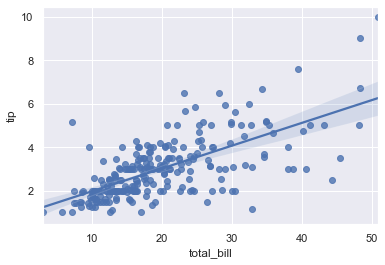

In [3]:
# 默认绘制散点图、线性回归线、95%置信区间
sns.regplot(x="total_bill", y="tip", data=tips) 

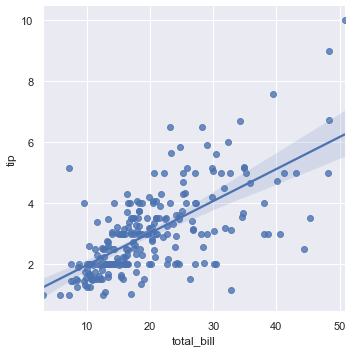

In [4]:
# 默认绘制散点图、线性回归线、95%置信区间
sns.lmplot(x="total_bill", y="tip", data=tips) 

### sns.regplot()和sns.lmplot()函数的区别
+ 数据集
    + sns.regplot()可以接受多种格式的数据，例如numpy arrays,Series、DataFrame等  
    + sns.lmplot()只能接受DataFrame，并传递给data参数，x、y参数必须是字符串，指代数据列名
    
    
    
+ 参数
sns.regplot()的参数是sns.lmplot()的子集，因而后续会以sns.lmplot()进行演示

### 某个变量是离散变量

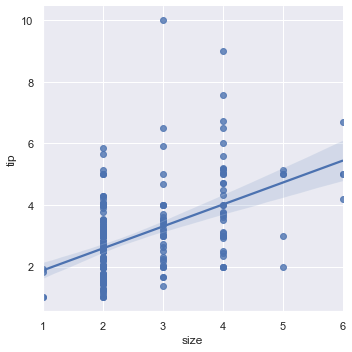

In [5]:
# 当某个变量是离散值时，散点图的效果比较差，难以观察数据的分布特征
sns.lmplot(x="size", y="tip", data=tips) 

#### jitter参数
给离散变量添加噪声

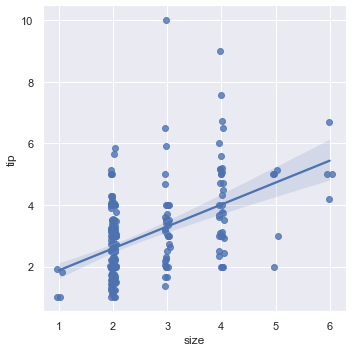

In [6]:
# 设置jitter参数，给离散变量添加噪声，噪声只会影响散点图的绘制，不影响回归线的拟合
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05) 

#### x_estimator参数
Apply this function to each unique value of x and plot the resulting estimate. This is useful when x is a discrete variable. If x_ci is not None, this estimate will be bootstrapped and a confidence interval will be drawn.

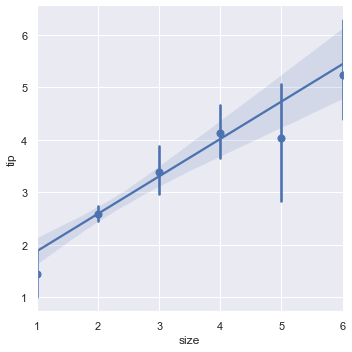

In [7]:
# x_ci参数默认为'ci'，绘制在每个离散值上y的置信区间（图中原点两侧延伸出的线条）
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean) 

## 拟合不同的模型

In [8]:
anscombe = sns.load_dataset("anscombe")

### 高阶多项式

#### 第一个数据集适合拟合线型模型

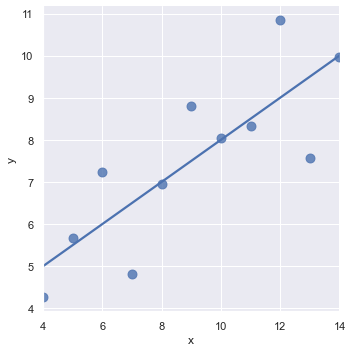

In [9]:
# ci参数设置是否绘制置信区间，scatter_kws字典会将参数传给plt.scatter()方法（本例中设置散点大小）
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80}) 

#### 第二个数据集不适合拟合线型模型

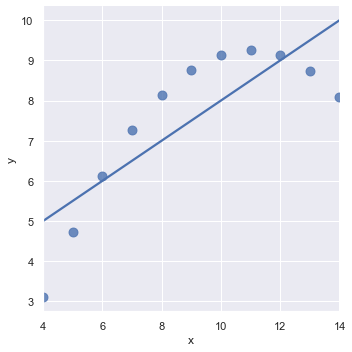

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80})

#### 绘制高阶多项式回归模型

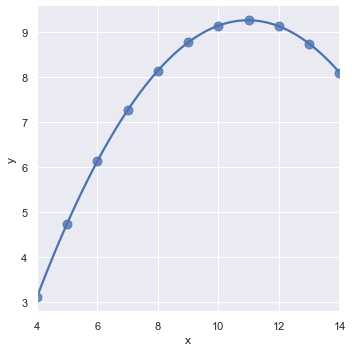

In [11]:
# 设置order=2，绘制2次多项式回归线
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80}) 

### 异常值

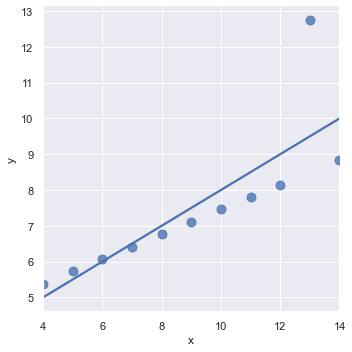

In [12]:
# 数据集中存在异常值
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80}) 

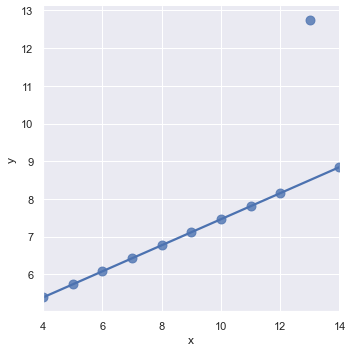

In [13]:
# 设置robust=True，在有异常值存在时，降低残差较大观测点的权重，以得到更稳健的回归线
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80}) 

### 逻辑回归

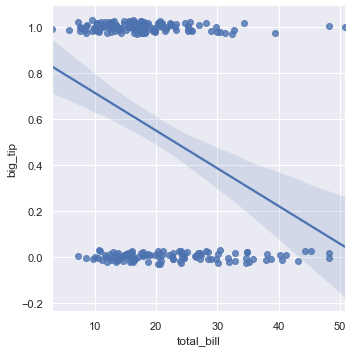

In [14]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03)

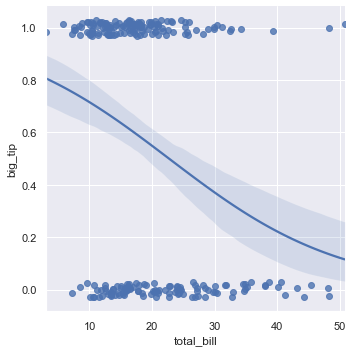

In [15]:
# 设置logistic=True，绘制逻辑回归线
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03) 

### 局部回归

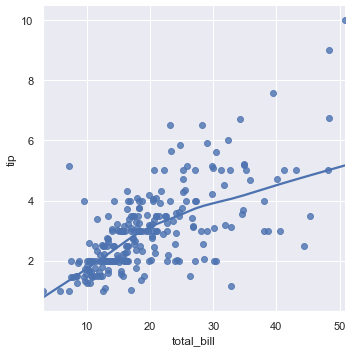

In [16]:
# 设置lowess=True，绘制局部回归线，由于计算量很大，不会绘制置信区间
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True) 

### 残差图
sns.residplot()

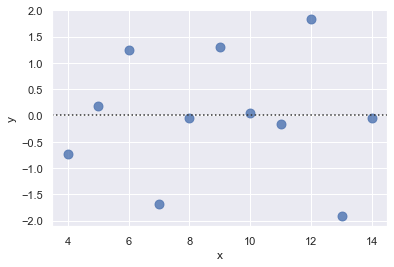

In [17]:
# 理想情况下，残差应该随机分布于直线y=0的上下
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80}) 

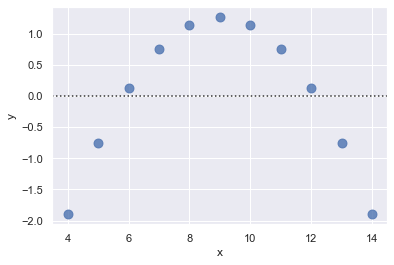

In [18]:
# 散点图如果呈现出特定分布，说明线性回归不合适
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80}) 

## 回归线的其他参数
sns.lmplot()与FacetGrid对象

### 第3个参数hue

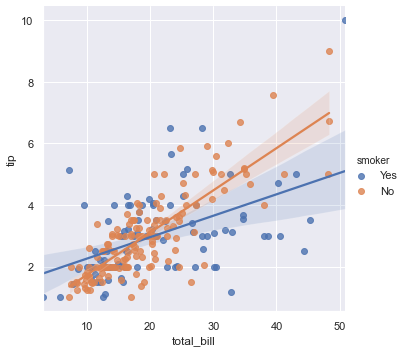

In [19]:
# 将两条回归线置于同一坐标系内，并用不同颜色加以区分
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips) #

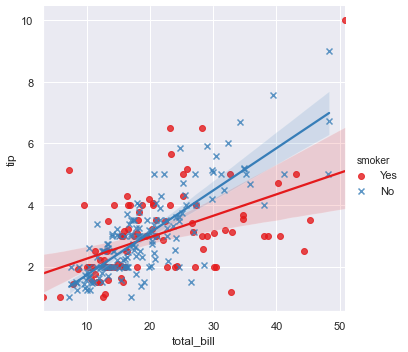

In [20]:
# markers参数设置散点形状，palette参数设置散点颜色
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1") 

### 第4个参数col

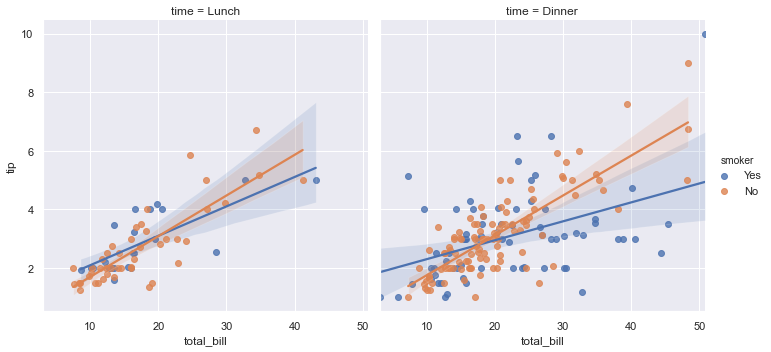

In [21]:
# 设置col参数
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips) 

### 第5个参数row

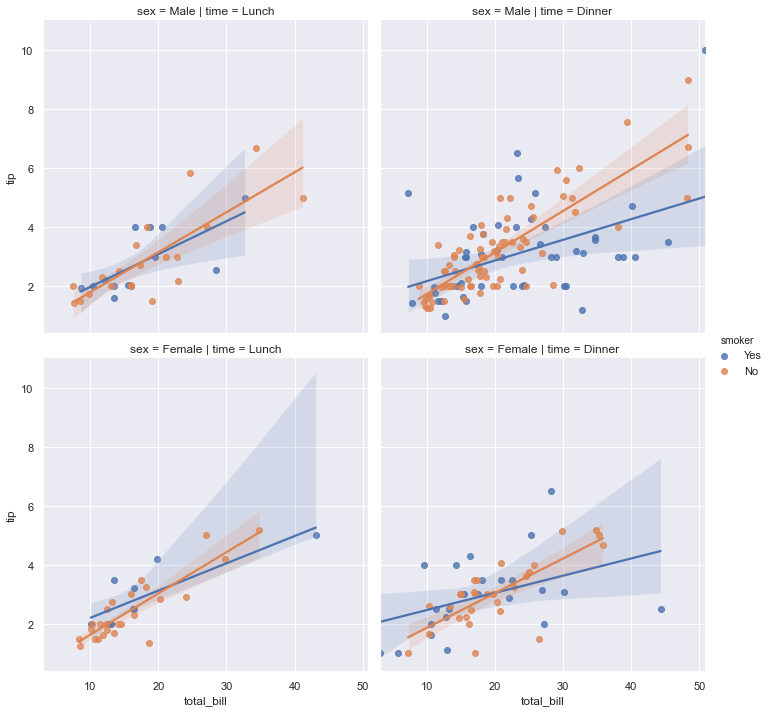

In [22]:
# 设置col、row参数，条件于第五个变量
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips) 

## 设置图表的大小、形状

### sns.regplot()和sns.lmplot()函数的区别
+ lmplot() uses regplot() internally and takes most of its parameters  


+ regplot() is an axes-level function, so it draws directly onto an axes (either the currently active axes or the one provided by the ax parameter)  
    + regplot() can happily coexist in a figure with other kinds of plots and will follow the global matplotlib color cycle


+ lmplot() is a figure-level function and creates its own figure, which is managed through a FacetGrid
    + lmplot() needs to occupy an entire figure, and the size and color cycle are controlled through function parameters, ignoring the global defaults

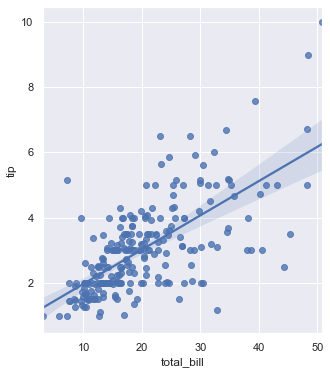

In [23]:
f, ax = plt.subplots(figsize=(5, 6))
# regplot()函数，为了设置图表的大小，需要创建一个figure对象
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax) 

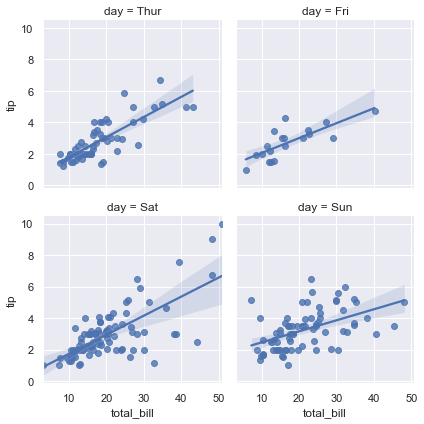

In [24]:
# height、aspect参数控制每个分面的高度、宽度（而非整个图表的大小）
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3) 

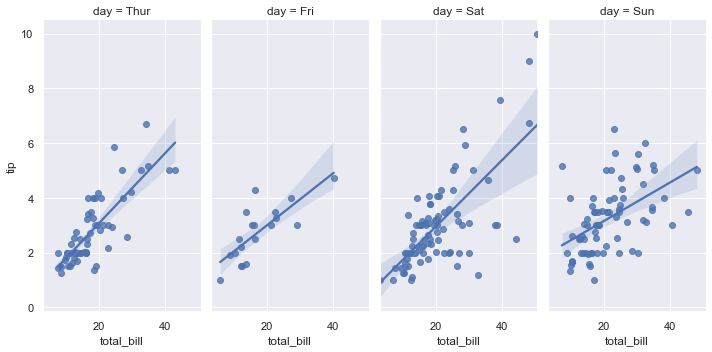

In [25]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5) # size是每个分面的高度，aspec*size是每个分面的宽度

## 在其他情况下绘制回归线

### 双变量分布图
sns.jointplot()和kind="reg"

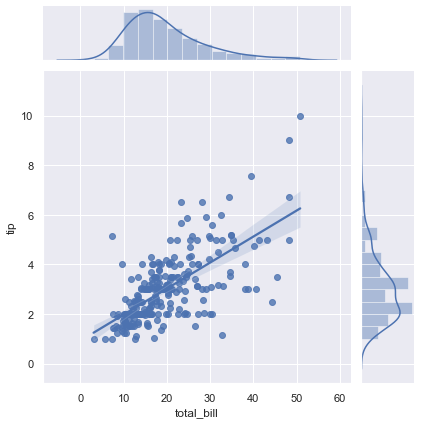

In [26]:
# sns.jointplot()中设置kind="reg"，绘制回归线
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg") 

### 多个变量相对于一个变量的回归线
PairGrid对象 + map方法、sns.pairplot() + kind参数，注意同条件于其他变量的回归线相区别
+ 条件于其他变量的回归线  
展示在不同的第三变量水平下，两个变量之间关系的变化情况
+ 多个变量相对于一个变量的回归线  
展示不同的变量与某个变量之间的关系

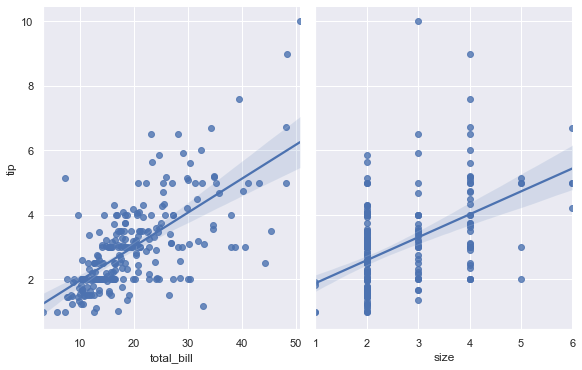

In [27]:
# 生成PairGrid对象
g = sns.PairGrid(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8) 
# 使用PairGrid对象的map方法，效果与下面pairplot函数中设置kind参数相同
g.map(sns.regplot) 

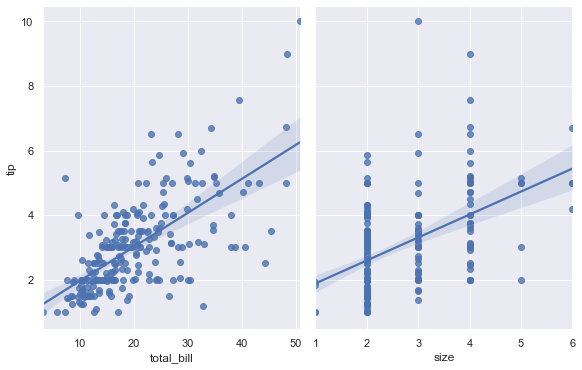

In [28]:
# 设置x_vars，y_vars参数
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg") 

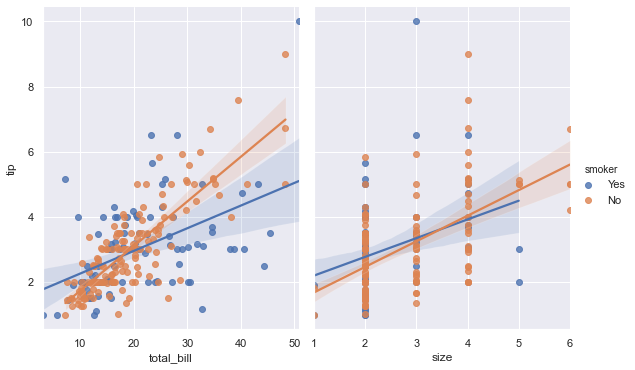

In [29]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg") # pairplot也可以通过参数hue，绘制条件于其他变量的回归线